In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/My Drive/LDS8_K279_ONLINE_VienTriThienAnh/LDS8_K279_VienTriThienAnh_Cuoi_ky/'

/content/gdrive/My Drive/LDS8_K279_ONLINE_VienTriThienAnh/LDS8_K279_VienTriThienAnh_Cuoi_ky


In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

In [4]:
model = load_model('model_checkpoint_25102022.h5')

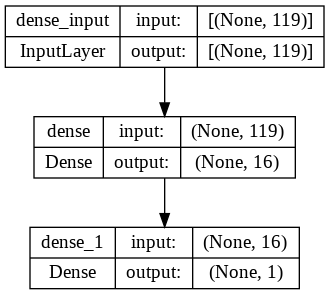

In [5]:
plot_model(model, to_file='ANN_model.png',
           show_shapes=True)
Image(filename='ANN_model.png')

### Make a new prediction for each sample in KDD test dataset

In [6]:
df_pred = pd.read_csv('Dataset/kddcup.testdata.unlabeled.gz',  compression='gzip', header=None)

In [7]:
# dataset has no column names so add them based on these links http://kdd.ics.uci.edu/databases/kddcup99/task.html, http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names.
df_pred.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',   
    'num_failed_logins',
    'logged_in',   
    'num_compromised',
    'root_shell',   
    'su_attempted',
    'num_root',   
    'num_file_creations',
    'num_shells',   
    'num_access_files',
    'num_outbound_cmds',   
    'is_hot_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',   
    'srv_diff_host_rate',
    'dst_host_count',   
    'dst_host_srv_count',
    'dst_host_same_srv_rate',   
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',   
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',   
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',   
    'dst_host_srv_rerror_rate'
]

In [8]:
df_pred.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,udp,private,SF,105,146,0,0,0,0,...,1,1,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0
1,0,udp,private,SF,105,146,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
2,0,udp,private,SF,105,146,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
3,0,udp,private,SF,105,146,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
4,0,udp,private,SF,105,146,0,0,0,0,...,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0


In [9]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2984154 entries, 0 to 2984153
Data columns (total 41 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int64  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int64  
 5   dst_bytes                    int64  
 6   land                         int64  
 7   wrong_fragment               int64  
 8   urgent                       int64  
 9   hot                          int64  
 10  num_failed_logins            int64  
 11  logged_in                    int64  
 12  num_compromised              int64  
 13  root_shell                   int64  
 14  su_attempted                 int64  
 15  num_root                     int64  
 16  num_file_creations           int64  
 17  num_shells                   int64  
 18  num_access_files             int64  
 19  

In [10]:
#Change to the correct dtypes
df_pred[['land', 'logged_in', 'is_hot_login','is_guest_login']] = df_pred[['land', 'logged_in','is_hot_login','is_guest_login']].apply(lambda x: x.astype(str))

In [11]:
prediction = df_pred.copy()

In [12]:
def encode_categorical(df,name):
    dummies = pd.get_dummies(df[name], drop_first=True)
    for c in dummies.columns:
        dum_name = f'{name} - {c}'
        df[dum_name] = dummies[c]
    df.drop(name,axis=1, inplace=True)

In [13]:
for c in prediction.columns:
    if prediction[c].dtype == 'object':
        encode_categorical(prediction, c)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(prediction)
prediction = sc.transform(prediction)

In [15]:
test_predictions = model.predict(prediction)

93255/93255 [==============================] - 119s 1ms/step


In [16]:
test_predictions = test_predictions.round(0)
test_predictions

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [17]:
df_outcome = pd.DataFrame(test_predictions, columns=['outcome_type'])
df_outcome.head()

,outcome_type
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0


In [18]:
df_pred = pd.concat([df_pred, df_outcome], axis=1)
df_pred.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome_type
0,0,udp,private,SF,105,146,0,0,0,0,...,1,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,1.0
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df_pred.outcome_type.value_counts()

1.0    2277819
0.0     706335
Name: outcome_type, dtype: int64

##### Comment:
- With the test dataset the model predicted there are 706335 normal connections and the rest are bad connections.